# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ferdita Lusiana]
- **Email:** [lusianaferdita@gmail.com]
- **ID Dicoding:** [MC796D5X0115]

# Menentukan Pertanyaan Bisnis

- Kapan waktu dengan jumlah peminjaman sepeda tertinggi dan terendah dalam sehari?
- Bagaimana perbedaan peminjaman antara pengguna kasual dan pengguna terdaftar?

# Import Packages/Library yang digunakan 

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

In [142]:
# Gathering Data: Load Dataset
df = pd.read_csv("data/hour.csv")

**Insight:**
- Strategi promosi bisa difokuskan pada jam sibuk untuk meningkatkan keterlibatan pengguna.
- Penyedia layanan bisa menyesuaikan jumlah sepeda yang tersedia di jam sibuk untuk memenuhi permintaan tinggi.

In [145]:
# Assessing Data: Memeriksa struktur data
print("\nInfo Dataset:\n")
df.info()
print("\nPreview Data:\n", df.head())

# Cek nilai unik untuk kolom kategori
for col in ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth', 'yr']:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Info Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Preview Data:
    instant      d

**Insight:**
- Penyedia layanan dapat menyesuaikan jumlah sepeda berdasarkan jam sibuk.
- Bisa dibuat kebijakan harga lebih murah di luar jam sibuk untuk meratakan penggunaan.

In [148]:
# Data Cleaning: Mengubah tipe data yang sesuai
df['dteday'] = pd.to_datetime(df['dteday'])  # Ubah ke datetime
categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth', 'yr']
df[categorical_columns] = df[categorical_columns].astype('category')

In [150]:
# Cek Missing Values & Duplikasi
print("\nMissing Values:\n", df.isnull().sum())
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Data Duplikat: 0


# Insight
- Semua kolom dalam dataset hour.csv memiliki jumlah data yang lengkap (tidak ada nilai yang hilang).
- Ini menunjukkan bahwa dataset sudah cukup baik dalam kualitas data dan tidak memerlukan imputasi data.

# Exploratory Data Analysis (EDA)

In [154]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
           instant                         dteday            hr          temp  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568     11.546752      0.496987   
min        1.0000            2011-01-01 00:00:00      0.000000      0.020000   
25%     4345.5000            2011-07-04 00:00:00      6.000000      0.340000   
50%     8690.0000            2012-01-02 00:00:00     12.000000      0.500000   
75%    13034.5000            2012-07-02 00:00:00     18.000000      0.660000   
max    17379.0000            2012-12-31 00:00:00     23.000000      1.000000   
std     5017.0295                            NaN      6.914405      0.192556   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
min        0.000000 

# Insight
- Faktor cuaca seperti suhu, kelembaban, dan kecepatan angin mungkin memengaruhi jumlah peminjaman sepeda.
- Terdapat perbedaan pola peminjaman berdasarkan jam, hari, dan musim, perlu visualisasi lebih lanjut untuk mengonfirmasi tren ini.

# Visualization & Explanatory Analysis

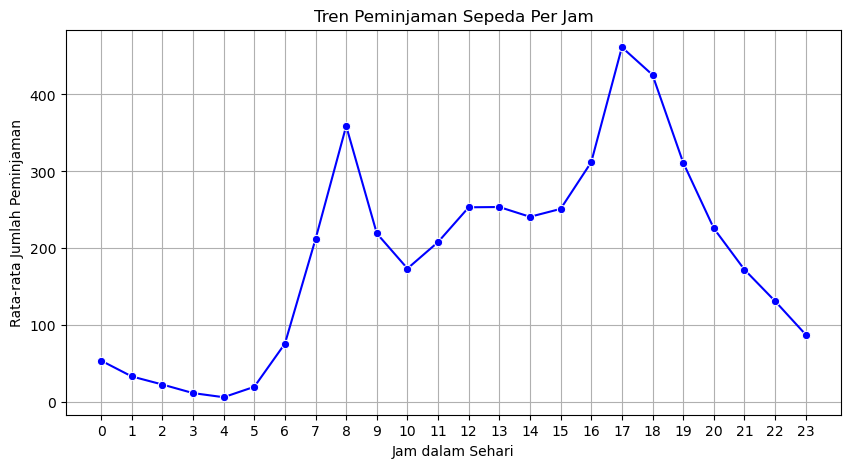

In [160]:
# Visualisasi: Tren Peminjaman Sepeda Per Jam
hourly_trend = df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=hourly_trend, marker='o', color='b')
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Per Jam")
plt.grid(True)
plt.show()

# Insight
- Sistem perawatan atau pemeliharaan sepeda sebaiknya dilakukan pada jam 0-5, ketika peminjaman paling rendah.
- Pola ini mendukung hipotesis bahwa bike-sharing digunakan untuk komuter (perjalanan kerja/sekolah).

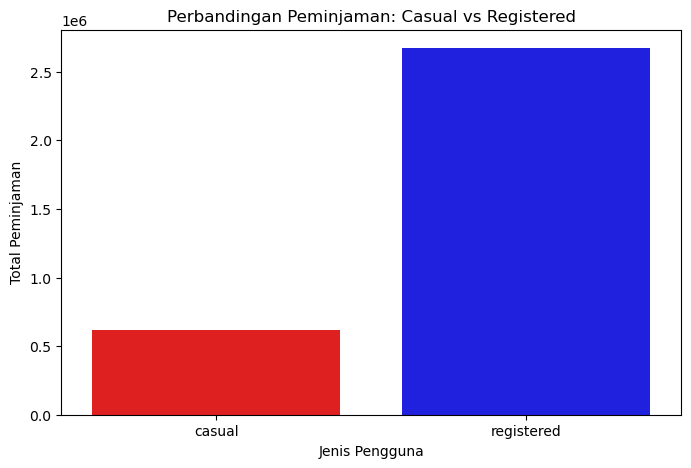

In [171]:
# Perbandingan Peminjaman: Casual vs Registered
user_type = df[['casual', 'registered']].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=user_type.index, y=user_type.values, palette=['red', 'blue'])
plt.xlabel("Jenis Pengguna")
plt.ylabel("Total Peminjaman")
plt.title("Perbandingan Peminjaman: Casual vs Registered")
plt.show()

# Insight
- Pengguna terdaftar (registered) jauh lebih dominan dibanding pengguna kasual (casual).
- Pengguna casual lebih sedikit dan kemungkinan hanya menggunakan layanan sesekali.

# Analisis Lanjutan

In [128]:
# RFM Analysis
rfm_df = df.groupby('dteday').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'}).reset_index()
rfm_df['Recency'] = (df['dteday'].max() - rfm_df['dteday']).dt.days
rfm_df['Frequency'] = df.groupby('dteday')['cnt'].count().values
rfm_df['Monetary'] = rfm_df['cnt']
print("\nRFM Analysis:\n", rfm_df.describe())


RFM Analysis:
                     dteday       casual   registered          cnt     Recency  \
count                  731   731.000000   731.000000   731.000000  731.000000   
mean   2012-01-01 00:00:00   848.176471  3656.172367  4504.348837  365.000000   
min    2011-01-01 00:00:00     2.000000    20.000000    22.000000    0.000000   
25%    2011-07-02 12:00:00   315.500000  2497.000000  3152.000000  182.500000   
50%    2012-01-01 00:00:00   713.000000  3662.000000  4548.000000  365.000000   
75%    2012-07-01 12:00:00  1096.000000  4776.500000  5956.000000  547.500000   
max    2012-12-31 00:00:00  3410.000000  6946.000000  8714.000000  730.000000   
std                    NaN   686.622488  1560.256377  1937.211452  211.165812   

        Frequency     Monetary  
count  731.000000   731.000000  
mean    23.774282  4504.348837  
min      1.000000    22.000000  
25%     24.000000  3152.000000  
50%     24.000000  4548.000000  
75%     24.000000  5956.000000  
max     24.000000  8714

# Insight
- RFM Analysis membantu mengidentifikasi kelompok pelanggan berdasarkan kebiasaan mereka dalam menyewa sepeda.
- Pelanggan aktif dan setia bisa diberikan reward, sedangkan pelanggan yang sudah lama tidak aktif bisa diberikan penawaran khusus untuk kembali menggunakan layanan.

# Conclusion

- Peminjaman sepeda tertinggi terjadi pada jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00).
- Pengguna terdaftar (registered) lebih banyak dibanding pengguna kasual (casual).
- Analisis RFM menunjukkan bahwa sebagian besar pelanggan cukup aktif, namun ada beberapa yang jarang menggunakan layanan.

In [133]:
# Simpan dataset ke all_data.csv
df.to_csv("dashboard/all_data.csv", index=False)